Importando Bibiliotecas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=012ba9d35af0c9fcec0a0ffccc661638b5525678340078375d165a60b853fd63
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
!pip install numpy

Definindo a Classe e Estruturando Funções de Pertinência

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

class ControladorFuzzyRobo:

      def __init__(self):
        self.sensor_esquerdo = None
        self.sensor_centro = None
        self.sensor_direita = None
        self.valores_saida = None

      def fuzzificandoentradas(self,valorsensoresquerda,valorsensorcentro,valorsensordireita):
        sensordex = np.arange(0, 1.02, 0.02)
        sensoresquerdabaixo = fuzz.trimf(sensordex, [0, 0, 0.5])
        sensoresquerdamedio = fuzz.trimf(sensordex, [0, 0.5, 1])
        sensoresquerdaalto = fuzz.trimf(sensordex, [0.5, 1, 1])
        sensorcentrobaixo = fuzz.trimf(sensordex, [0, 0, 0.5])
        sensorcentromedio = fuzz.trimf(sensordex, [0, 0.5, 1])
        sensorcentroalto = fuzz.trimf(sensordex, [0.5, 1, 1])
        sensordireitabaixo = fuzz.trimf(sensordex, [0, 0, 0.5])
        sensordireitamedio = fuzz.trimf(sensordex, [0, 0.5, 1])
        sensordireitaalto = fuzz.trimf(sensordex, [0.5, 1, 1])

        self.sensor_esquerdo = fuzz.interp_membership(sensordex, sensoresquerdabaixo, valorsensoresquerda), \
                           fuzz.interp_membership(sensordex, sensoresquerdamedio, valorsensoresquerda), \
                           fuzz.interp_membership(sensordex, sensoresquerdaalto, valorsensoresquerda)

        self.sensor_centro = fuzz.interp_membership(sensordex, sensorcentrobaixo, valorsensorcentro), \
                             fuzz.interp_membership(sensordex, sensorcentromedio, valorsensorcentro), \
                             fuzz.interp_membership(sensordex, sensorcentroalto, valorsensorcentro)

        self.sensor_direita = fuzz.interp_membership(sensordex, sensordireitabaixo, valorsensorcentro), \
                            fuzz.interp_membership(sensordex, sensordireitamedio, valorsensorcentro), \
                            fuzz.interp_membership(sensordex, sensordireitaalto, valorsensorcentro)

        self.plot_membership_functions(sensordex, sensoresquerdabaixo, sensoresquerdamedio, sensoresquerdaalto, "Sensor Esquerdo")
        self.plot_membership_functions(sensordex, sensorcentrobaixo, sensorcentromedio, sensorcentroalto, "Sensor Central")
        self.plot_membership_functions(sensordex, sensordireitabaixo, sensordireitamedio, sensordireitaalto, "Sensor Direito")

      def plot_membership_functions(self, x, baixo, medio, alto, titulo):
                            plt.figure()
                            plt.plot(x, baixo, 'b', linewidth=1.5, label='Low')
                            plt.plot(x, medio, 'g', linewidth=1.5, label='Medium')
                            plt.plot(x, alto, 'r', linewidth=1.5, label='High')
                            plt.title(titulo)
                            plt.legend()

      def plot_aggregated_membership_function(self, valores_saida, titulo):
                          saidax = np.arange(0, 5, 1)
                          plt.figure()
                          plt.plot(saidax, valores_saida, 'b', linewidth=1.5, label='Conjunto de Saída')
                          plt.title(titulo)
                          plt.legend()

      def aplicandoregras(self):
                regras = np.zeros((3, 3, 3, 5))

                #Alguns valores de entrada
                regras[2, 1, 0] = [0, 0, 0.5, 0.5, 1]
                regras[2, 0, 0] = [0, 0, 0.7, 0.7, 0.5]

                valordisparoregra = np.zeros((3, 3, 3))

                for i in range(3):
                  for j in range(3):
                    for k in range(3):
                      valordisparoregra[i, j, k] = min(self.sensor_esquerdo[i], self.sensor_centro[j], self.sensor_direita[k])

                self.valores_saida = np.zeros(5) #Para compor o conjunto de saída

                for i in range(3):
                  for j in range(3):
                    for k in range(3):
                      self.valores_saida += np.maximum(regras[i, j, k], valordisparoregra[i, j, k])

                self.plot_aggregated_membership_function(self.valores_saida, "Saída")

      def desfuzzificandosaida(self):
        centroide = fuzz.defuzz(np.arange(0, 5, 1), self.valores_saida, 'centroide')
        return centroide

      def calculandovelocidaderotacao(self, valores_saida):
        velocidadedireita = 0
        velocidadeesquerda = 0

        if valores_saida == 0:
                velocidadeesquerda = -1
                velocidadedireita = 1
        elif valores_saida == 5: #Configurar o robô para alterar a direção em relação a uma determinada direção
                velocidadeesquerda = 1
                velocidadedireita = -1
        return velocidadeesquerda,velocidadedireita

Valores de Exemplo

Informe o valor do sensor esquerdo: 0.1
Informe o valor do sensor central: 0.3
Informe o valor do sensor direito: 5
Saída: 2.1808118081180807
Velocidade de Rotacao Esquerda: 0
Velocidade de Rotacao Direita: 0


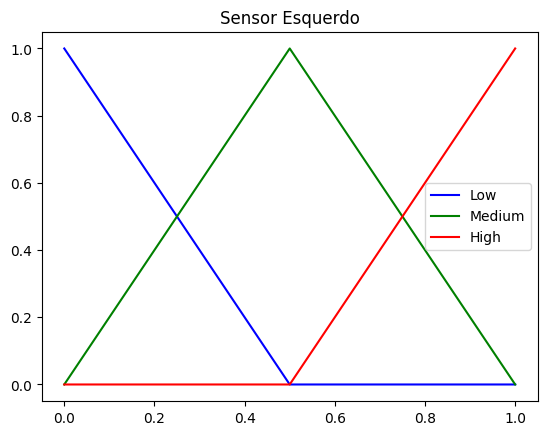

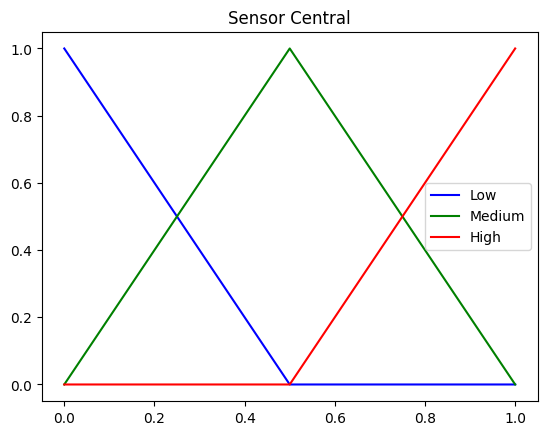

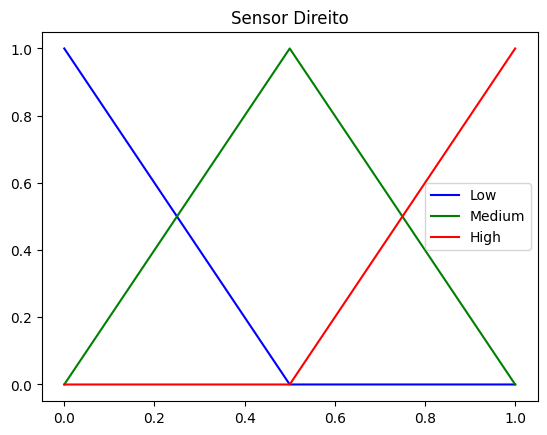

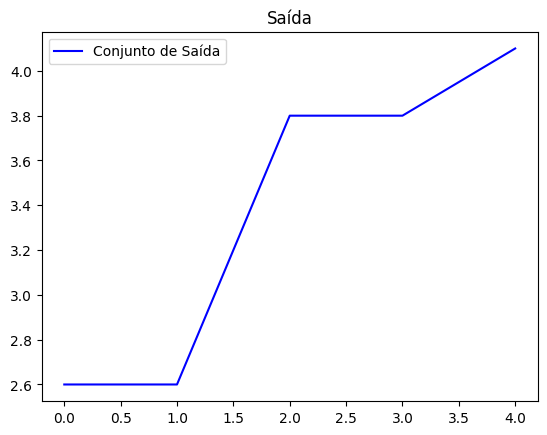

In [ ]:
controlador = ControladorFuzzyRobo()

valorsensoresquerda = float(input("Informe o valor do sensor esquerdo: "))
valorsensorcentro = float(input("Informe o valor do sensor central: "))
valorsensordireita = float(input("Informe o valor do sensor direito: "))

controlador.fuzzificandoentradas(valorsensoresquerda, valorsensorcentro, valorsensordireita)
controlador.aplicandoregras()
valores_saida = controlador.desfuzzificandosaida()
velocidadeesquerda, velocidadedireita = controlador.calculandovelocidaderotacao(valores_saida)

print("Saída:", valores_saida)
print("Velocidade de Rotacao Esquerda:", velocidadeesquerda)
print("Velocidade de Rotacao Direita:", velocidadedireita)
plt.show()